## LCM-LoRA

In [1]:
import torch
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, LCMScheduler
from diffusers.utils import load_image

model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
lcm_lora_id = 'latent-consistency/lcm-lora-sdxl'
t2i_adapter_id = 'TencentARC/t2i-adapter-depth-midas-sdxl-1.0'

adapter = T2IAdapter.from_pretrained(t2i_adapter_id, torch_dtype=torch.float16, variant='fp16')

pipe = StableDiffusionXLAdapterPipeline.from_pretrained(model_id, adapter=adapter, torch_dtype=torch.float16, variant='fp16')
pipe.load_ip_adapter('h94/IP-Adapter', subfolder='sdxl_models', weight_name='ip-adapter_sdxl.safetensors')
pipe.load_lora_weights(lcm_lora_id)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

/home/remko2/anaconda3/envs/diffusers1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.84it/s]
The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [2]:
init_image = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/statue.png")
depth_map = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/depth.png")
prompt = "'best quality, high quality"

100%|██████████| 4/4 [00:01<00:00,  2.63it/s]


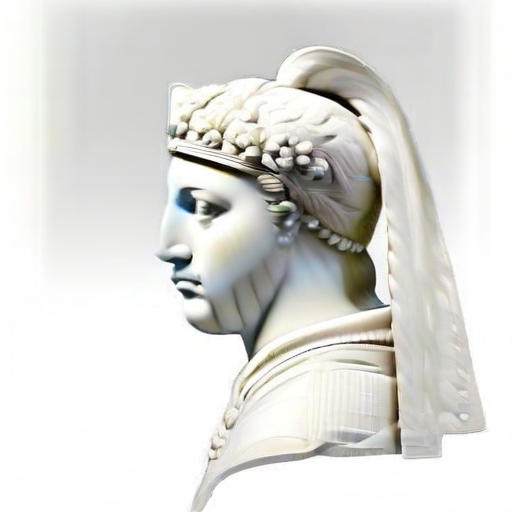

In [38]:
for i in range(3):
    image = pipe(prompt,
                image=depth_map,
                ip_adapter_image=init_image,
                num_inference_steps=4,
                guidance_scale=1.0,
                adapter_conditioning_scale=0.6,
                adapter_conditioning_factor=1.0,
                ).images[0]
    display(image.resize((512, 512)))
    if i == 2:
        del image

In [39]:
del image

## SDXL Turbo

In [ ]:
import torch
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter
from diffusers.utils import load_image

model_id = 'Lykon/dreamshaper-xl-turbo'
t2i_adapter_id = 'TencentARC/t2i-adapter-depth-midas-sdxl-1.0'

adapter = T2IAdapter.from_pretrained(t2i_adapter_id, torch_dtype=torch.float16, variant='fp16')

pipe = StableDiffusionXLAdapterPipeline.from_pretrained(model_id, adapter=adapter, torch_dtype=torch.float16, variant='fp16')
pipe.load_ip_adapter('h94/IP-Adapter', subfolder='sdxl_models', weight_name='ip-adapter_sdxl.safetensors')
pipe.enable_model_cpu_offload()

In [39]:
init_image = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/statue.png")
depth_map = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/depth.png")
prompt = "'best quality, high quality"

100%|██████████| 7/7 [00:01<00:00,  5.57it/s]


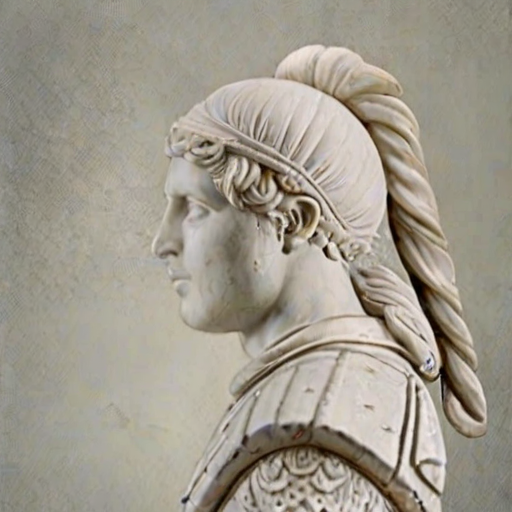

100%|██████████| 7/7 [00:01<00:00,  5.68it/s]


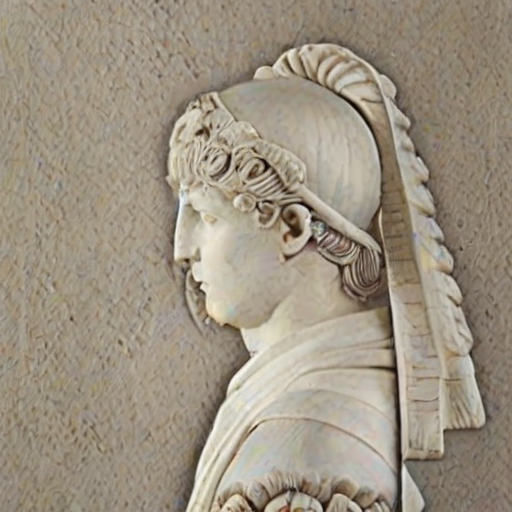

100%|██████████| 7/7 [00:01<00:00,  5.53it/s]


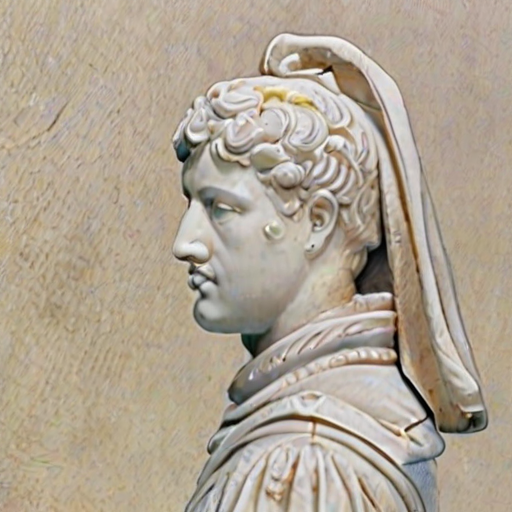

In [56]:
for i in range(3):
    image = pipe(prompt,
                 image=depth_map,
                 ip_adapter_image=init_image,
                 num_inference_steps=7,
                 guidance_scale=1.0,
                 adapter_conditioning_scale=0.6,
                 adapter_conditioning_factor=1.0,
                 ).images[0]
    display(image.resize((512, 512)))
    if i == 2:
        del image

## Standard SDXL

In [1]:
import torch
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter
from diffusers.utils import load_image

model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
t2i_adapter_id = 'TencentARC/t2i-adapter-depth-midas-sdxl-1.0'

adapter = T2IAdapter.from_pretrained(t2i_adapter_id, torch_dtype=torch.float16, variant='fp16')

pipe = StableDiffusionXLAdapterPipeline.from_pretrained(model_id, adapter=adapter, torch_dtype=torch.float16, variant='fp16')
pipe.load_ip_adapter('h94/IP-Adapter', subfolder='sdxl_models', weight_name='ip-adapter_sdxl.safetensors')
pipe.enable_model_cpu_offload()

/home/remko2/anaconda3/envs/diffusers1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  7.66it/s]


In [2]:
init_image = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/statue.png")
depth_map = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/depth.png")
prompt = "'best quality, high quality"

100%|██████████| 50/50 [00:04<00:00, 12.02it/s]


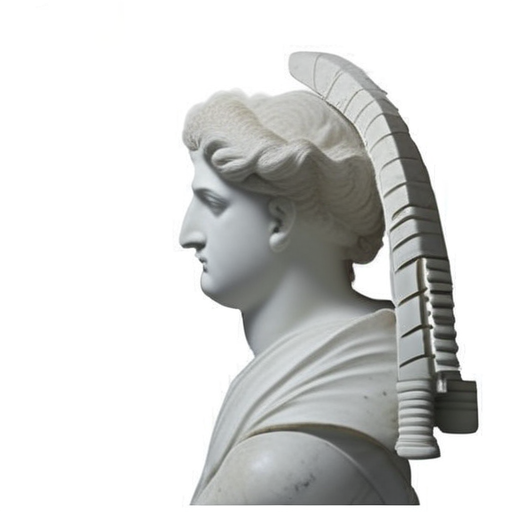

100%|██████████| 50/50 [00:04<00:00, 12.32it/s]


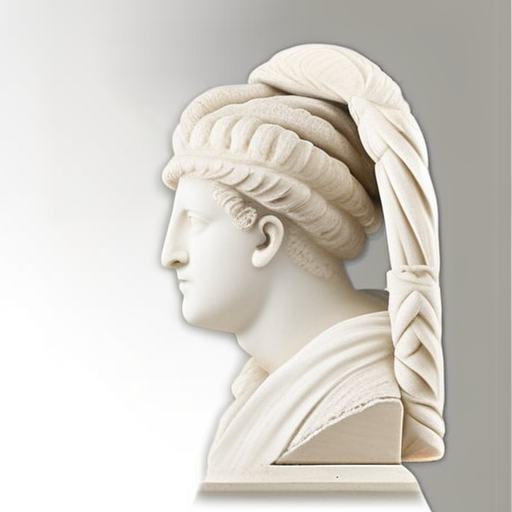

100%|██████████| 50/50 [00:04<00:00, 12.34it/s]


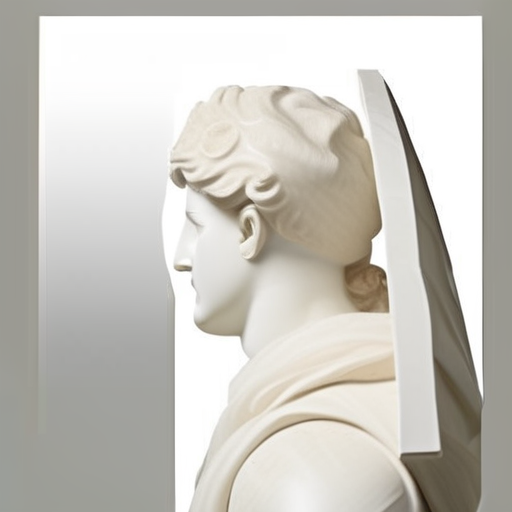

In [6]:
for i in range(3):
    image = pipe(prompt,
                 image=depth_map,
                 ip_adapter_image=init_image,
                 num_inference_steps=50,
                 guidance_scale=6.5,
                 adapter_conditioning_scale=0.7,
                 adapter_conditioning_factor=1.0,
                 ).images[0]
    display(image)
    if i == 2:
        del image